In [1]:
# GET PARAMETERS
import os 
import sys
import pandas as pd 
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from examples.benchmark import local_get_args
from examples.train_and_visu_non_recurrent import evaluate_config,get_netmob_consumption_on_specifics_tags_apps,get_ds,train_the_config,get_df_for_visualisation
from examples.train_model_on_k_fold_validation import load_configuration
from plotting.plotting import error_per_station_calendar_pattern

Training and Hyper-parameter tuning with Ray is not possible


In [2]:
type_POIs = ['iris','iris','iris','iris','iris']  #'stadium'
spatial_units = ['Charmettes', 'Charles Hernu', 'Les Brotteaux', 'Bellecombe-Thiers', 'Tonkin Sud']  #'Matmut Stadium Gerland',
apps = ['Instagram','Google_Maps','Twitter']
POI_or_stations = ['POI','POI','POI','POI','POI',] #'POI',
transfer_modes = ['DL','UL']
expanded= ''
individual_poi = False
sum_ts_pois = True

training_mode = 'test'

trial_id = 'subway_in_STGCN_MSELoss_2025_01_06_08_00_94523'
# 'subway_in_subway_out_STGCN_MSELoss_2025_02_14_16_03_71730'
args,_ = load_configuration(trial_id,load_config=True)

if False : 
    ds,args,trial_id,save_folder,df_loss = get_ds(args_init=args,fold_to_evaluate=[args.K_fold-1])

    df_verif = getattr(ds.tensor_limits_keeper,f"df_verif_{training_mode}")  
    df_true = pd.DataFrame(Y_true[:,:,0],columns = ds.spatial_unit,index = df_verif.iloc[:,-1])

trainer,ds,args,trial_id,df_loss = train_the_config(args,modification= {'epochs':0,
                                                                        'validation_split_method' : 'forward_chaining_cv',
                                                                        'min_fold_size_proportion': 0.75,
                                                                        'data_augmentation':False,
                                                                        'train_prop':0.6,
                                                                        'valid_prop':0.2,
                                                                        'test_prop':0.2,
                                                                        'stacked_contextual': False,
                                                                        'temporal_graph_transformer_encoder': False,
                                                                        'TGE_num_layers': False,
                                                                        'TGE_num_heads': False,
                                                                        'TGE_FC_hdim': False,
                                                                        'compute_node_attr_with_attn': False,
                                                                        'freq':'15min'},
                                                            fold_to_evaluate=[args.K_fold-1])
Preds,Y_true,T_labels = trainer.testing(ds.normalizer, training_mode =training_mode)                                  
df_true,df_predictions = get_df_for_visualisation(ds,Preds,Y_true,training_mode)
netmob_consumption = get_netmob_consumption_on_specifics_tags_apps(df_true.index,apps,type_POIs,spatial_units,POI_or_stations,transfer_modes,expanded,individual_poi,sum_ts_pois)


>>>> Load best CONFIG
>>>>Model: STGCN; K_fold = 6; Loss function: MSE 
Invalid dates within this fold: 776



Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  776
Init U/Utarget size: torch.Size([4702, 40, 7])/torch.Size([4702, 40, 1]) Train/Valid/Test 2821 940 940

 ===== ERROR WITH prefetch_factor====  
ValueError: prefetch_factor option could only be specified in multiprocessing.let num_workers > 0 to enable multiprocessing
Invalid dates within this fold: 481
Considered Spatial-Unit:  Index(['AMP', 'BEL', 'BRO', 'COR', 'CUI', 'CUS', 'FLA', 'GOR', 'BLA', 'GRA',
       'GUI', 'GIL', 'HEN', 'HOT', 'LAE', 'MAS', 'MER', 'LUM', 'PRY', 'PER',
       'SAN', 'SAX', 'VMY', 'JEA', 'BON', 'CHA', 'VAI', 'VEN', 'MAC', 'GAR',
       'FOC', 'REP', 'GER', 'DEB', 'JAU', 'CPA', 'CRO', 'PAR', 'SOI', 'OGA'],
      dtype='object', name='COD_TRG')

Init Dataset: 'torch.Size([4597, 40]) with 183880 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  481
Init U/Utarget size: torch.Size([2940, 40, 7])/torch.Size([2940, 40, 1]) Train/

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
ERROR 1: PROJ: proj_create_from_database

In [3]:
from examples.train_and_visu_non_recurrent import visualisation_special_event
width=1200
height=300
visualisation_special_event(trainer,df_true,None,station= 'CHA',width=width,height=height,training_mode=training_mode,netmob_consumption=netmob_consumption)

Loading BokehJS ...

## Compute Lag Correlation between Subway-in and Contextual Data:

In [122]:
# GET PARAMETERS
import os 
from os import listdir
import sys
import pandas as pd 
import numpy as np 
import pickle
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from build_inputs.tile_ids_around_stations import DATA_FOLDER_PATH
from load_inputs.subway_in import load_subway_in_df,FILE_NAME,load_data,get_trigram_correspondance,list_of_invalid_period
from constants.paths import FOLDER_PATH
from load_inputs.netmob_POIs import START,END
from examples.train_model_on_k_fold_validation import load_configuration
from build_inputs.load_datasets_to_predict import preprocess_dataset
from load_inputs.netmob_POIs_per_station import load_data_npy
from utils.utilities import get_INVALID_DATES

ROOT = f"{DATA_FOLDER_PATH}/rrochas"
FOLDER_PATH = 'prediction_validation'

trial_id = 'subway_in_subway_out_STGCN_MSELoss_2025_02_14_16_03_71730'
args,_ = load_configuration(trial_id,load_config=True)
freq = '15min'
coverage = pd.date_range(start=START, end=END, freq=freq)[:-1]


invalid_dates_i = get_INVALID_DATES(list_of_invalid_period,args.freq)
coverage_filtered = [c for c in coverage if not c in invalid_dates_i]


>>>> Load best CONFIG


#### Load Subway-in Inputs:

In [124]:
dataset = load_data(args,ROOT,FOLDER_PATH,coverage_period = coverage,filename=None)
#df = load_subway_in_df(args,ROOT,FOLDER_PATH,FILE_NAME,None)##__ Load Inputs: 
df = dataset.df
df = df.loc[coverage]
df_filtered = df.loc[coverage_filtered]

preprocesed_ds = preprocess_dataset(dataset,args,invalid_dates_i,normalize = True)

date_sequences = preprocesed_ds.tensor_limits_keeper.df_verif.iloc[:,-2]
sequence_tensors = preprocesed_ds.U


Init Dataset: 'torch.Size([7392, 40]) with 295680 Total nb of elements and 0 Nan values
nb subway_in invalid dates:  1216


#### Load NetMob Inputs: 

In [3]:
subway_stations = get_trigram_correspondance()
list_COD_TRG = list(subway_stations.COD_TRG)

args.NetMob_selected_apps = ['Google_Maps','Deezer','Instagram']
args.NetMob_transfer_mode = ['DL','UL']
args.NetMob_selected_tags = [f"station_epsilon{epsilon}" for epsilon in [100,200,300]]
args.NetMob_expanded = ''


netmob_ts = []
for id_station in list_COD_TRG:
    netmob_ts.append(load_data_npy(id_station,ROOT,FOLDER_PATH,args))

#[Stations, Apps,Tags,transfer_mode,time-slots]
netmob_ts = np.stack(netmob_ts)
netmob_ts = netmob_ts.transpose(0,4,1,2,3)  #--> [Stations,time-slots, Apps,Tags,transfer_mode]
netmob_ts = netmob_ts.reshape(netmob_ts.shape[0],netmob_ts.shape[1],-1)

name_conextual = [f"{app}_{tag}_{transfer_mode}" for app in args.NetMob_selected_apps for tag in args.NetMob_selected_tags for transfer_mode in args.NetMob_transfer_mode]

# NetMob TS with filtered invalid dates: 
# netmob_ts_filtered = netmob_ts[:,list(np.where(coverage.isin(coverage_filtered))[0]),:,:,:]

### Compute Lag Correlation on sliding window: 

In [4]:
from anomaly.compute_lag_correlation import group_by_weekday_hour_minutes,lag_correlations
lag_corrs = lag_correlations(df, netmob_ts, lags=[0,1,2,3], window=6,name_conextual=name_conextual)

In [5]:
station_i = 0
lag_k = 1
corr_min = 0.8

df_corr_i_k = group_by_weekday_hour_minutes(lag_corrs,station_i,lag_k)
mask = (df_corr_i_k > corr_min).any(axis=1)
df_corr_i_k[mask]

Google_Maps_station_epsilon100_DL  \
weekday hour minute                                      
0       1    30                               0.757346   
        2    30                               0.674318   
        7    45                               0.818993   
        8    0                                0.784410   
1       1    30                               0.795647   
        7    15                               0.839360   
             30                               0.785952   
             45                               0.828843   
        8    0                                0.848780   
             15                               0.790019   
2       1    30                               0.771972   
        3    45                               0.874666   
        4    0                                0.761798   
        7    0                                0.760187   
3       1    30                               0.854140   
             45                               0.809159   
        2    45                               0.932302   
        7    15                               0.803266   
             30                               0.808536   
        8    0                                0.653439   
4       7    45                               0.717201   
        8    15                               0.656760   
5       2    0                                0.618343   
             15                               0.582460   
        5    0                                0.199749   
6       3    0                                0.830270   
             30                               0.871757   
             45                               0.853450   
        4    0                                0.624115   

                     Google_Maps_station_epsilon100_UL  \
weekday hour minute                                      
0       1    30                               0.801440   
        2    30                               0.825468   
        7    45                               0.840109   
        8    0                                0.786434   
1       1    30                               0.811970   
        7    15                               0.850297   
             30                               0.785624   
             45                               0.824097   
        8    0                                0.854840   
             15                               0.794395   
2       1    30                               0.775278   
        3    45                               0.856974   
        4    0                                0.698702   
        7    0                                0.802431   
3       1    30                               0.861439   
             45                               0.830904   
        2    45                               0.952106   
        7    15                               0.799778   
             30                               0.806809   
        8    0                                0.649885   
4       7    45                               0.711372   
        8    15                               0.635154   
5       2    0                                0.649020   
             15                               0.634354   
        5    0                                0.145229   
6       3    0                                0.782387   
             30                               0.817077   
             45                               0.850634   
        4    0                                0.459099   

                     Google_Maps_station_epsilon200_DL  \
weekday hour minute                                      
0       1    30                               0.762965   
        2    30                               0.487790   
        7    45                               0.820687   
        8    0                                0.781845   
1       1    30                               0.796524   
        7    15  

In [6]:
station_i = 0
lag_k = 1
corr_min = 0.95

df_corr_i_k = lag_corrs[station_i][f'lag_{lag_k}'].copy()
mask = (df_corr_i_k > corr_min).any(axis=1)
df_corr_i_k[mask]

,Google_Maps_station_epsilon100_DL,Google_Maps_station_epsilon100_UL,Google_Maps_station_epsilon200_DL,Google_Maps_station_epsilon200_UL,Google_Maps_station_epsilon300_DL,Google_Maps_station_epsilon300_UL,Deezer_station_epsilon100_DL,Deezer_station_epsilon100_UL,Deezer_station_epsilon200_DL,Deezer_station_epsilon200_UL,Deezer_station_epsilon300_DL,Deezer_station_epsilon300_UL,Instagram_station_epsilon100_DL,Instagram_station_epsilon100_UL,Instagram_station_epsilon200_DL,Instagram_station_epsilon200_UL,Instagram_station_epsilon300_DL,Instagram_station_epsilon300_UL
2019-03-16 01:30:00,0.960605,0.967050,0.969235,0.968650,0.977740,0.970475,0.480455,0.520001,0.430334,0.578998,0.388994,0.601006,0.917114,0.922202,0.932116,0.934889,0.921310,0.922917
2019-03-16 01:45:00,0.948609,0.962906,0.952953,0.960313,0.965367,0.965335,0.737938,0.670714,0.641547,0.637339,0.564374,0.591939,0.932751,0.932385,0.922266,0.919930,0.911760,0.907513
2019-03-16 02:00:00,0.770548,0.796178,0.791697,0.817732,0.847425,0.866442,0.927824,0.968311,0.839766,0.935110,0.800388,0.909224,0.319487,0.471034,0.178595,0.241219,-0.091869,-0.193182
2019-03-16 05:30:00,0.113680,0.160973,0.299610,0.445987,0.142491,0.207050,-0.922329,-0.868221,-0.790895,-0.835564,-0.700928,-0.740761,0.961644,0.871694,0.910180,0.748517,0.896983,0.734028
2019-03-16 08:00:00,0.438235,0.535820,0.376515,0.481066,0.348368,0.457162,0.839125,0.892072,0.850811,0.881494,0.773454,0.868654,0.974929,0.947418,0.974181,0.947422,0.962964,0.922200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-29 14:15:00,-0.003699,0.006006,-0.087574,0.008596,-0.130979,-0.003091,-0.066021,-0.052061,-0.074646,-0.036604,-0.207222,-0.079314,0.859410,0.826014,0.950292,0.934724,0.959219,0.962975
2019-05-29 14:30:00,0.026061,0.021068,-0.056210,0.010016,-0.135726,-0.038897,0.103973,0.086745,0.096776,0.095718,-0.029587,0.042785,0.895263,0.897981,0.946132,0.974536,0.943045,0.976461
2019-05-29 19:00:00,0.951809,0.574943,0.836823,0.632564,0.719107,0.706627,-0.313308,0.100693,-0.070288,0.526917,0.050395,0.530764,0.548964,0.548119,0.565748,0.587933,0.541248,0.559807
2019-05-31 08:00:00,0.955306,0.884217,0.946285,0.901427,0.935056,0.883343,0.659919,0.337360,0.562245,0.260596,0.548386,0.200062,0.860305,0.759800,0.802322,0.680128,0.836425,0.702028


# Isolation des pattern très régulier, de ceux non réguliers:

In [148]:
def extract_points(df, time_scale):
    pts = []
    # Convertir l'index datetime en minutes depuis minuit
    time_minutes = time_scale*(df.index.weekday*24*60+df.index.hour * 60 + df.index.minute)
    for col in df.columns:
        temp = pd.DataFrame({
            'time': time_minutes,
            'value': df[col].values,
            'series': col
        })
        pts.append(temp)
    return pd.concat(pts, ignore_index=True)[['time','value']]


# Init: 
station_i = 0 
eps = 30
min_samples = 10
time_scale = 1000  # 15 min between each sample -> min distance between point = 150 

# Sub-df 
station_name = df_filtered.columns[station_i]
df_station_i = df_filtered.iloc[:,station_i:station_i+1]

# Extract Point
projection_points = extract_points(df_station_i, time_scale=time_scale)

# DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
labels = db.fit_predict(projection_points.values)

# Plot: 
list_df_ts = []
for cluster_label,label_name in zip([-1,0],['outlier','regular']):
    if cluster_label == -1:
        indices = np.where(labels == cluster_label)
        if type(np.where(labels == cluster_label)) == tuple:
            indices = indices[0]
        globals()[f"df_{station_name}_{label_name}"] = df_station_i.iloc[indices,station_i:station_i+1]
    else:
        globals()[f"df_{station_name}_{label_name}"] = df_station_i.reset_index().drop(indices).set_index('index')


    globals()[f"df_{station_name}_{label_name}"].columns = [f"{c}_{label_name}" for c in globals()[f"df_{station_name}_{label_name}"].columns]
    list_df_ts.append(globals()[f"df_{station_name}_{label_name}"])

plot_TS(list_df_ts,width=1200,height=400,bool_show=True,title=f"AMP Distribution",scatter = True)

    

Loading BokehJS ...

figure(id='p2032', ...)

In [149]:
labels

array([327, 408,   0, ..., 405,  -1, 411])

<Axes: xlabel='time', ylabel='value'>

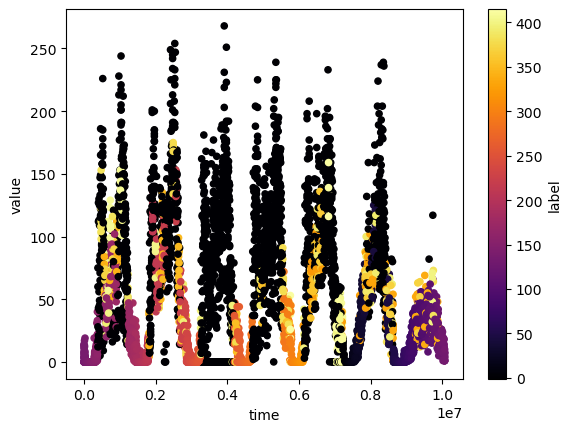

In [150]:
projection_points_to_plot = projection_points.copy()
projection_points_to_plot['label'] = labels
projection_points_to_plot.plot.scatter(x='time',y='value',c='label',cmap='inferno'
                      )

In [ ]:
for grp in df_station_i.groupby([df_station_i.index.weekday,df_station_i.index.hour,df_station_i.index.minute]):
    calendar_info = grp[0]
    df_calendar_tuple = grp[1]
    break
df_calendar_tuple

In [47]:
station_i = 0 
station_name = df.columns[station_i]
list_df_ts = []
for cluster_label,label_name in zip([-1,0],['outlier','regular']):
    globals()[f"df_{station_name}_{label_name}"] = df.iloc[:,station_i:station_i+1][cluster_timeslots == cluster_label]
    globals()[f"df_{station_name}_{label_name}"].columns = [f"{c}_{label_name}" for c in globals()[f"df_{station_name}_{label_name}"].columns]
    list_df_ts.append(globals()[f"df_{station_name}_{label_name}"])

plot_TS(list_df_ts,width=1200,height=400,bool_show=True,title=f"AMP Distribution",scatter = True)

/tmp/ipykernel_114111/58924186.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  globals()[f"df_{station_name}_{label_name}"] = df.iloc[:,station_i:station_i+1][cluster_timeslots == cluster_label]
/tmp/ipykernel_114111/58924186.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  globals()[f"df_{station_name}_{label_name}"] = df.iloc[:,station_i:station_i+1][cluster_timeslots == cluster_label]


Loading BokehJS ...

figure(id='p1302', ...)

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def cluster_group(s,random_state=42):
    X = s.values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=random_state).fit(X)
    labels = kmeans.labels_
    clusters = {cl: {'size': np.sum(labels==cl), 'var': np.var(X[labels==cl])} for cl in np.unique(labels)}
    valid = {cl: info for cl, info in clusters.items() if info['size'] >= 3}
    if valid:
        main = min(valid, key=lambda cl: valid[cl]['var'])
        out_labels = np.where(labels==main, 0, -1)
    else:
        out_labels = np.full_like(labels, -1)
    return pd.Series(out_labels, index=s.index)

def label_column(col):
    grp = col.groupby([col.index.weekday, col.index.hour, col.index.minute])
    return grp.apply(lambda s: cluster_group(s)).reset_index(level=[0,1,2], drop=True)

labels = pd.DataFrame({col: label_column(df[col]) for col in df.columns})

/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return

KeyboardInterrupt: 

In [26]:
from bokeh.plotting import figure
from bokeh.models import Legend,BoxAnnotation,DatetimeTickFormatter,RangeTool
import torch 
from datetime import timedelta
import pandas as pd 
from bokeh.palettes import Set3_12 
from bokeh.palettes import Plasma256 
from bokeh.palettes import Turbo256 as palette

from bokeh.plotting import output_notebook,show
import numpy as np 


import torch.nn as nn
import torch
import sys
import os

def plot_TS(list_df_ts,width=400,height=1500,bool_show=False,title=f"Time Serie Intensity of NetMob apps consumption",scatter = False):
       p = figure(x_axis_type="datetime",title=title,
                     width=width,height=height)
       legend_it = []
       colors = palette

       if not(type(list_df_ts)==list):
              list_df_ts= [list_df_ts]
       
       nb_cols = [df_i.shape[1] for df_i in list_df_ts]
       total_nb_ts = int(np.sum(np.array(nb_cols)))
       for i,df_i in enumerate(list_df_ts):
              for k,column in enumerate(df_i.columns):
                     col_ind = np.sum(np.array(nb_cols[:i]))+k
                     if scatter: 
                            c = p.scatter(x=df_i.index, y=df_i[column], alpha=0.8,color = colors[int(col_ind*(255/total_nb_ts))])
                     else:
                            c = p.line(x=df_i.index, y=df_i[column], alpha=0.8,color = colors[int(col_ind*(255/total_nb_ts))])
                     displayed_legend = str(column)
                     legend_it.append((displayed_legend, [c]))

       p.xaxis.major_label_orientation = 1.2  # Pour faire pivoter les labels des x
       legend = Legend(items=legend_it)
       legend.click_policy="hide"
       p.add_layout(legend, 'right')
       p.xaxis.formatter=DatetimeTickFormatter(
            months="%b",
            days="%a %d %b",
            hours="%a %d %b %H:%M",
            minutes="%a %d  %H:%M"
                )

       if bool_show:
              output_notebook()
              show(p)

       return p

       

In [138]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

# Supposons que df est un DataFrame avec df.index = DatetimeIndex et df["value"] = série temporelle

# ------------------------ Méthode 1 : GroupBy par weekday, hour, minute ------------------------
df_g = df.copy().iloc[:,station_i:station_i+1].rename(columns = {df.columns[station_i]: 'value'})
df_g["wday"] = df_g.index.weekday
df_g["hour"] = df_g.index.hour
df_g["minute"] = df_g.index.minute
grp_stats = df_g.groupby(["wday", "hour", "minute"])["value"].agg(["mean", "std"])
df_g = df_g.join(grp_stats, on=["wday", "hour", "minute"], rsuffix="_grp")
df_g["zscore"] = (df_g["value"] - df_g["mean"]) / df_g["std"]
df_g["outlier_gb"] = df_g["zscore"].abs() > 3

# ------------------------ Méthode 2 : Rolling (fenêtre glissante) ------------------------
df_r =df.copy().iloc[:,station_i:station_i+1].rename(columns = {df.columns[station_i]: 'value'})
window_size = "1H"
rolling_mean = df_r["value"].rolling(window_size).mean()
rolling_std = df_r["value"].rolling(window_size).std()
df_r["zscore"] = (df_r["value"] - rolling_mean) / rolling_std
df_r["outlier_rolling"] = df_r["zscore"].abs() > 3

# ------------------------ Méthode 3 : Clustering (DBSCAN) ------------------------
df_c = df.copy().iloc[:,station_i:station_i+1].rename(columns = {df.columns[station_i]: 'value'})
df_c["time_num"] = (df_c.index - df_c.index[0]).total_seconds()
X = df_c[["time_num", "value"]].fillna(method="ffill").values
dbscan = DBSCAN(eps=0.02, min_samples=5)
labels = dbscan.fit_predict(X)
df_c["outlier_dbscan"] = labels == -1

# ------------------------ Méthode 4 : ML (IsolationForest) ------------------------
df_i =df.copy().iloc[:,station_i:station_i+1].rename(columns = {df.columns[station_i]: 'value'})
df_i["time_num"] = (df_i.index - df_i.index[0]).total_seconds()
X_if = df_i[["time_num", "value"]].fillna(method="ffill")
iso = IsolationForest(contamination=0.01, random_state=0)
df_i["outlier_if"] = iso.fit_predict(X_if) == -1


/tmp/ipykernel_253531/3837136066.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_mean = df_r["value"].rolling(window_size).mean()
/tmp/ipykernel_253531/3837136066.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  rolling_std = df_r["value"].rolling(window_size).std()
/tmp/ipykernel_253531/3837136066.py:29: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = df_c[["time_num", "value"]].fillna(method="ffill").values
/tmp/ipykernel_253531/3837136066.py:37: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_if = df_i[["time_num", "value"]].fillna(method="ffill")


In [155]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# df: DataFrame index = DatetimeIndex, colonne "value"
# seq_len: nombre de points dans chaque séquence
# Crée un DataFrame sequences_df avec colonnes:
#   "sequence" : np.array de longueur seq_len
#   "wday", "hour", "minute"
def create_sequences(df, seq_len=10):
    data = []
    vals = df["value"].values
    for i in range(seq_len - 1, len(df)):
        seq = vals[i - seq_len + 1 : i + 1]
        dt = df.index[i]
        data.append({
            "sequence": seq,
            "wday": dt.weekday(),
            "hour": dt.hour,
            "minute": dt.minute
        })
    return pd.DataFrame(data)

# Crée un cluster KMeans (k=1 ou k=2 selon besoins) par (wday,hour,minute),
# calcule la distance au centre principal, marque "is_anomaly" si trop distant.
def cluster_sequences(sequences_df, n_clusters=1, dist_threshold=2.0):
    results = []
    grouped = sequences_df.groupby(["wday","hour","minute"])
    for (w,h,m), group in grouped:
        X = np.stack(group["sequence"].values)
        km = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
        dists = np.min(km.transform(X), axis=1)
        if n_clusters == 1:
            anomalies = dists > dist_threshold * np.std(dists)
        else:
            main_label = np.bincount(km.labels_).argmax()
            anomalies = (km.labels_ != main_label) | (dists > dist_threshold * np.std(dists))
        tmp = group.copy()
        tmp["is_anomaly"] = anomalies
        results.append(tmp)
    return pd.concat(results)


df_i = df.copy().iloc[:,station_i:station_i+1].rename(columns = {df.columns[station_i]: 'value'})
sequences_df = create_sequences(df_i, seq_len=6)
result_df = cluster_sequences(sequences_df, n_clusters=1, dist_threshold=2.0)


In [141]:
df_g[df_g['outlier_gb']]

,value,wday,hour,minute,mean,std,zscore,outlier_gb
2019-03-18 01:00:00,1.0,0,1,0,0.090909,0.301511,3.015113,True
2019-03-30 04:45:00,2.0,5,4,45,0.181818,0.603023,3.015113,True
2019-04-09 01:00:00,9.0,1,1,0,0.818182,2.713602,3.015113,True
2019-04-09 01:45:00,5.0,1,1,45,0.454545,1.507557,3.015113,True
2019-04-28 01:30:00,13.0,6,1,30,1.181818,3.919647,3.015113,True
2019-04-28 02:00:00,2.0,6,2,0,0.181818,0.603023,3.015113,True
2019-04-28 02:15:00,4.0,6,2,15,0.363636,1.206045,3.015113,True
2019-04-28 02:30:00,1.0,6,2,30,0.090909,0.301511,3.015113,True
2019-05-02 01:15:00,3.0,3,1,15,0.272727,0.904534,3.015113,True
2019-05-14 04:45:00,2.0,1,4,45,0.181818,0.603023,3.015113,True


In [25]:
if False:
    station_name = 'AMP'

    list_tile_ids = result.at[station_name,'tile_id']
    gdf_stations.loc[list_tile_ids].explore()

gdf_stations.explore()